# IRIS 데이터 분류

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv

--2021-12-27 00:13:55--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.66K  --.-KB/s    in 0s      

2021-12-27 00:13:55 (44.5 MB/s) - ‘iris.csv’ saved [2720/2720]



In [ ]:
!ls -al
!head iris.csv

total 20
drwxr-xr-x 1 root root 4096 Dec 27 00:13 .
drwxr-xr-x 1 root root 4096 Dec 26 23:58 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 2720 Dec 27 00:13 iris.csv
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,0,0,1
5.0,2.3,3.3,1.0,0,1,0
4.9,2.5,4.5,1.7,0,0,1
4.9,3.1,1.5,0.1,1,0,0
5.7,3.8,1.7,0.3,1,0,0
4.4,3.2,1.3,0.2,1,0,0
5.4,3.4,1.5,0.4,1,0,0
6.9,3.1,5.1,2.3,0,0,1
6.7,3.1,4.4,1.4,0,1,0


In [ ]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

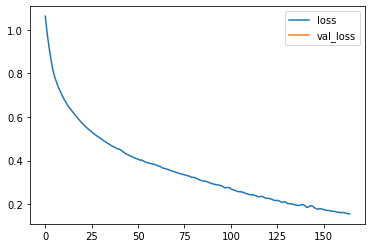

loss =  0.15563859045505524 , val_loss =  None


In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=200, verbose=0, callbacks=[plot_losses])

loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.7280622e-01 2.6182000e-02 1.0118117e-03]
 [4.1540161e-02 9.3504882e-01 2.3411114e-02]
 [9.6586633e-01 3.2956161e-02 1.1775825e-03]
 [2.7391534e-02 9.4776517e-01 2.4843249e-02]
 [9.6660298e-01 3.2235805e-02 1.1611093e-03]
 [9.7572291e-01 2.3336368e-02 9.4073085e-04]
 [9.7527391e-01 2.3754565e-02 9.7151659e-04]
 [9.7456622e-01 2.4431694e-02 1.0020364e-03]
 [4.0200636e-02 9.4223958e-01 1.7559750e-02]
 [9.6665758e-01 3.2143418e-02 1.1989758e-03]
 [5.3230217e-03 2.5819761e-01 7.3647940e-01]
 [1.8997364e-02 9.3296754e-01 4.8035085e-02]
 [9.6925718e-01 2.9636972e-02 1.1058748e-03]
 [5.7029160e-04 1.9843224e-02 9.7958654e-01]
 [9.6210235e-01 3.6659099e-02 1.2385116e-03]
 [1.4070895e-02 7.7071935e-01 2.1520983e-01]
 [1.9842668e-02 9.4397849e-01 3.6178838e-02]
 [9.6633852e-01 3.2440893e-02 1.2206620e-03]
 [9.7314137e-01 2.5829753e-02 1.0288615e-03]
 [3.6297716e-02 9.4020355e-01 2.3498667e-02]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


# loss categorical_crossentropy

2가지 crossentropy 사용 방법
- categorical_crossentropy
- sparse_categorical_crossentropy

## categorical_crossentropy
y의 값이 one hot encoding인 경우
```
1,0,0
0,1,0
0,0,1
```

출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어
```

loss 설정
```
model.compile(..., loss='categorical_crossentropy')
```


## sparse_categorical_crossentropy
y의 값이 one hot encoding인 경우
```
0
1
2
```

출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어. 1이 아니라 클래스 수 3
```

loss 설정
```
model.compile(..., loss='sparse_categorical_crossentropy')
```


# iris_dnn with category index

아래의 코드는 dnn_iris_and_optimizer.ipynb의 코드를 기반으로 한다.


In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv

--2021-12-27 00:17:23--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-12-27 00:17:23 (46.3 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [ ]:
!ls -al
!head iris_with_category_index.csv

total 24
drwxr-xr-x 1 root root 4096 Dec 27 00:17 .
drwxr-xr-x 1 root root 4096 Dec 26 23:58 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 2720 Dec 27 00:13 iris.csv
-rw-r--r-- 1 root root 2218 Dec 27 00:17 iris_with_category_index.csv
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
septal_length,septal_width,petal_length,petal_width,class
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [ ]:
iris = pd.read_csv("iris_with_category_index.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 102ms/step - loss: 0.0336 - accuracy: 1.0000
loss= 0.033610064536333084
acc= 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.91348326e-01 8.45346414e-03 1.98226626e-04]
 [8.23880825e-03 9.86449420e-01 5.31175965e-03]
 [9.75442469e-01 2.40646657e-02 4.92956897e-04]
 [3.88952647e-03 9.91532266e-01 4.57828585e-03]
 [9.93459702e-01 6.38535805e-03 1.54916765e-04]
 [9.93690968e-01 6.15918776e-03 1.49817351e-04]
 [9.94466841e-01 5.40290447e-03 1.30339758e-04]
 [9.94733095e-01 5.14273392e-03 1.24186743e-04]
 [1.36686061e-02 9.80360329e-01 5.97107783e-03]
 [9.91131842e-01 8.67202878e-03 1.96096298e-04]
 [1.00673677e-03 3.09643745e-01 6.89349532e-01]
 [3.35349678e-03 9.89801586e-01 6.84493734e-03]
 [9.88482654e-01 1.12688895e-02 2.48432218e-04]
 [2.99798179e-04 8.94885734e-02 9.10211682e-01]
 [9.94127274e-01 5.72745595e-03 1.45245533e-04]
 [2.34907283e-03 9.66050208e-01 3.16006765e-02]
 [4.20663320e-03 9.90147412e-01 5.64592564e-03]
 [9.92035329e-01 7.78396800e-03 1.80681032e-04]
 [9.91538167e-01 8.27163551e-03 1.90194274e-04]
 [4.46152454e-03 9.90750492e-01 4.78800759e-03]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 